# Analysis on the significance of the day of the week in terms of box office sales

## How about the day of the week? Can the day of the week play a major role in box office success?

In [1]:
## ## The key to the code below is to use datetime function which is built into pandas. 
##Using the weekday function we will determine the day of the week for each movie
##and then using group by we will see how much the day of the week matters.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Importing necessary Libraries
%matplotlib inline
plt.style.use('seaborn')

In [3]:
df=pd.read_csv('Mojo_Plus_IMDB_Data.csv') #bringing in the dataframe
df.head()

,Unnamed: 0,Title,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Distributor,Genres,Rating,...,Unnamed: 0_y,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,The Woman in Black 2: Angel of Death,26501323.0,2602,2602,15027415.0,56.7,Relativity Media,"['Drama', 'Horror', 'Thriller']",PG-13,...,14310.0,"[53, 27, 18]",288158.0,en,The Woman in Black 2: Angel of Death,10.240,2015-01-02,The Woman in Black 2: Angel of Death,5.1,627.0
1,1,The Search for General Tso,54275.0,13,2,9336.0,17.2,IFC Films,"['Comedy', 'Documentary', 'History', 'Mystery']",NaN,...,12399.0,[99],261041.0,en,The Search for General Tso,1.404,2014-04-20,The Search for General Tso,6.7,31.0
2,2,The Taking of Tiger Mountain,228984.0,13,7,50621.0,22.1,Well Go USA Entertainment,"['Action', 'Adventure', 'Biography', 'History'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Li'l Quinquin,7192.0,2,1,3204.0,44.5,Kino Lorber,"['Comedy', 'Crime', 'Mystery']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Trace Amounts,80735.0,7,0,0.0,0.0,GathrFilms,"['Adventure', 'Documentary', 'Drama', 'History']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.Date.head() #checking the format of the date column to see how to manipulate it

0    2015-01-02
1    2015-01-02
2    2015-01-02
3    2015-01-02
4    2015-01-02
Name: Date, dtype: object

In [5]:
df["Date_dt"]=df.Date.apply(lambda x:pd.to_datetime(x))
df['Date_dt'].head() #now we a datetime object, so we can use dt methods.

0   2015-01-02
1   2015-01-02
2   2015-01-02
3   2015-01-02
4   2015-01-02
Name: Date_dt, dtype: datetime64[ns]

In [6]:
df['Date_dt'].dt.dayofweek.head(20) #Monday=0 to Sunday=6

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    1
15    2
16    4
17    4
18    4
19    4
Name: Date_dt, dtype: int64

In [7]:
df['Day_of_week']=df["Date_dt"].dt.dayofweek
df.loc[:,['Date_dt','Day_of_week']].tail(20)

,Date_dt,Day_of_week
4519,2020-07-17,4
4520,2020-07-24,4
4521,2020-07-24,4
4522,2020-07-24,4
4523,2020-07-31,4
4524,2020-07-31,4
4525,2020-07-31,4
4526,2020-07-31,4
4527,2020-07-31,4
4528,2020-07-31,4


In [8]:
df.groupby('Day_of_week').mean() #grouping stats by day

,Unnamed: 0,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Runtime,Unnamed: 0_y,id,popularity,vote_average,vote_count
Day_of_week,,,,,,,,,,,,
0,3054.662162,2.668980e+06,520.432432,120.878378,2.611442e+05,5.981081,102.500000,20943.277778,403862.111111,6.181889,6.444444,560.222222
1,2913.616279,7.550841e+06,626.383721,239.337209,1.579992e+06,7.460465,92.023256,19832.166667,391075.708333,7.893500,6.650000,289.791667
2,2246.915942,1.986293e+07,763.501449,616.857971,3.722627e+06,15.644928,104.391304,18540.031056,346214.416149,8.422323,6.650932,1162.652174
3,2774.144654,2.767923e+06,390.685535,165.559748,8.090972e+05,15.184277,105.182390,19945.235294,402171.735294,5.282235,6.144118,527.705882
4,2177.787165,1.734543e+07,706.471703,614.920390,5.403061e+06,29.606390,103.328188,18447.867889,346824.333333,8.029353,6.324965,891.055477
5,2920.516667,6.407899e+05,410.766667,388.816667,4.313515e+05,66.043333,75.400000,21934.400000,440911.900000,2.451900,6.180000,69.700000
6,3182.795082,3.379500e+06,541.721311,424.565574,2.171019e+05,49.900000,121.459016,17687.285714,327002.785714,6.327714,6.228571,861.071429


In [9]:
y=df.groupby('Day_of_week').mean()['Opening_Weekend_Gross'] #collecting open weeknend sales numbers
x=y.index

In [10]:
print(df['Opening_Weekend_Percent_of_Gross'].mean(),df['Opening_Weekend_Percent_of_Gross'].median())


28.262348534919543 25.3


## As a percentage of gross, 28% of revenue on average comes on opening weekend so clearly opening weekend greatly affects box office success. 
## One reason for this could be a domino effect that once a movie does poorly at release, it is very hard to rebound.

Text(0.5, 1.0, 'How the day of the week influences Opening Weekend Revenue')

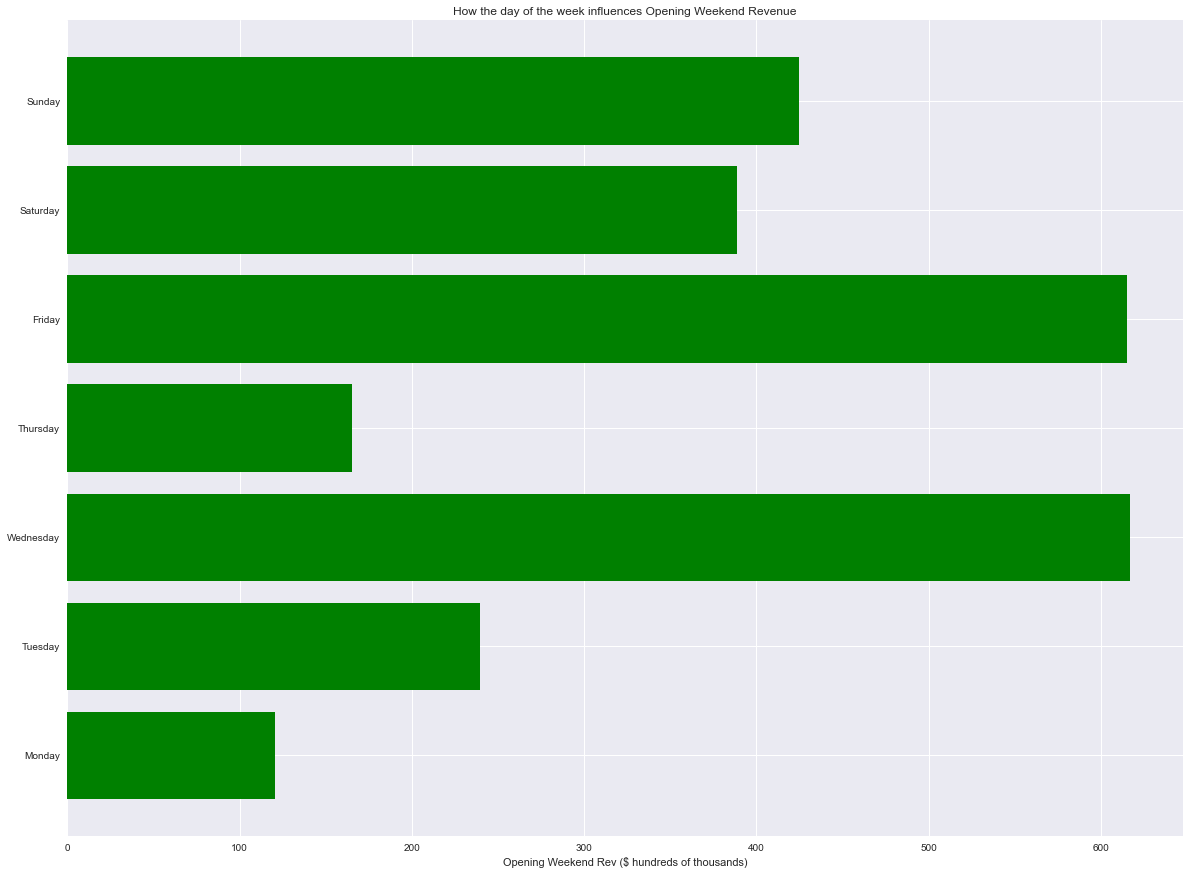

In [11]:
fig,ax=plt.subplots(figsize=(20,15))
ax.barh(x,y,color='green')
ax.set_yticklabels(labels=['Monday',"Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_xlabel('Opening Weekend Rev ($ hundreds of thousands)')
ax.set_title('How the day of the week influences Opening Weekend Revenue')

## Clearly this visualization shows that Friday and Wednesday do the best in terms of sales.
## Friday is the most common day of the week for a new release so this result is not surprising.

## However, Wednesday did remarkbly well and as a day of the week with less competition from other new movies, I would recommend a Wednesday release.